In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### We have a regression problem since we are trying to predict Selling_Price (continuous feature)

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Drop columns that we dont'need for the prediction
df.drop(["Car_Name"], axis=1, inplace=True)

In [7]:
# Create new derived feature which denotes how many years old the car is

df["Current_Year"] = 2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [8]:
df["nr_years"] = df["Current_Year"] - df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,nr_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [9]:
df.drop(["Year", "Current_Year"], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,nr_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [10]:
# Handling missing values
df.isna().sum().values.any()

False

In [11]:
df.isna().sum()

# There are no missing values

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
nr_years         0
dtype: int64

In [12]:
# Checking for categorical features

for col in df.columns:
    if df[col].dtype == "object":
        print(col)
        print()
    if df[col].dtype == "int64":
        print(col + " : " + str(df[col].unique()))
        print()

# Fuel_Type, Seller_Type, Transmission, Owner, nr_years are categorical features

Kms_Driven : [ 27000  43000   6900   5200  42450   2071  18796  33429  20273  42367
   2135  51000  15000  26000  77427  41678  35500  41442  25000   2400
  50000  45280  56879  20000  55138  16200  44542  45000  51439  54200
  39000  49998  48767 127000  10079  62000  24524  46706  58000  45780
  64532  65000  25870  37000 104707  40000 135000  90000  70000  40534
  39485  41000  40001  40588  78000  47000   6000  11000  59000  88000
  12000  71000  56001  83000  36000  72000 135154  80000  89000  23000
  38000 197176 142000  56000  58242  75000  29000   8700  50024   3000
   1400   4000   1200   4100  21700  16500  18000   7000  35000  17000
  17500  33000  14000   5400   5700  46500  11500   1300   5000   3500
    500  11800  23500  16000  16600  32000  19000  24000  31000  13000
   8000   4300   8600  14500   1000  42000   5500   6700  13700  38600
  30000 213000  60000  21000   1900  22000  55000  49000 500000  53000
  92233  28200  53460  28282   3493  12479  34797   3435  21125 

In [13]:
# Checking for continuous features

for col in df.columns:
    if df[col].dtype == "float64":
        print(col)
        print()
    if df[col].dtype == "int64":
        print(col + " : " + str(df[col].unique()))
        print()
        
# Selling_Price, Present_Price, Kms_Driven are continuous features

Selling_Price

Present_Price

Kms_Driven : [ 27000  43000   6900   5200  42450   2071  18796  33429  20273  42367
   2135  51000  15000  26000  77427  41678  35500  41442  25000   2400
  50000  45280  56879  20000  55138  16200  44542  45000  51439  54200
  39000  49998  48767 127000  10079  62000  24524  46706  58000  45780
  64532  65000  25870  37000 104707  40000 135000  90000  70000  40534
  39485  41000  40001  40588  78000  47000   6000  11000  59000  88000
  12000  71000  56001  83000  36000  72000 135154  80000  89000  23000
  38000 197176 142000  56000  58242  75000  29000   8700  50024   3000
   1400   4000   1200   4100  21700  16500  18000   7000  35000  17000
  17500  33000  14000   5400   5700  46500  11500   1300   5000   3500
    500  11800  23500  16000  16600  32000  19000  24000  31000  13000
   8000   4300   8600  14500   1000  42000   5500   6700  13700  38600
  30000 213000  60000  21000   1900  22000  55000  49000 500000  53000
  92233  28200  53460  28282   349

In [14]:
# Encode categorical features 
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,nr_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [15]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,nr_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
nr_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

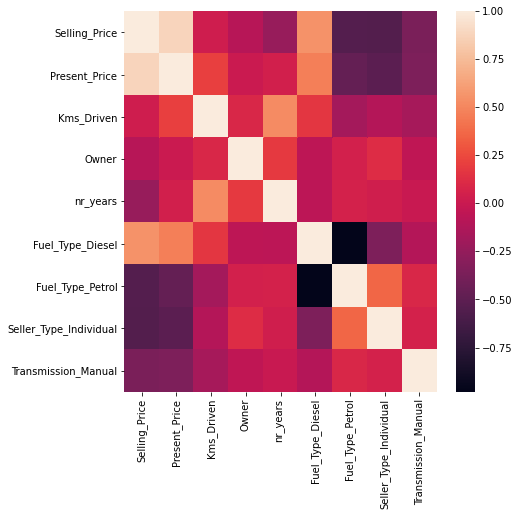

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

# Selling_Price and Present_Price are highly correlated

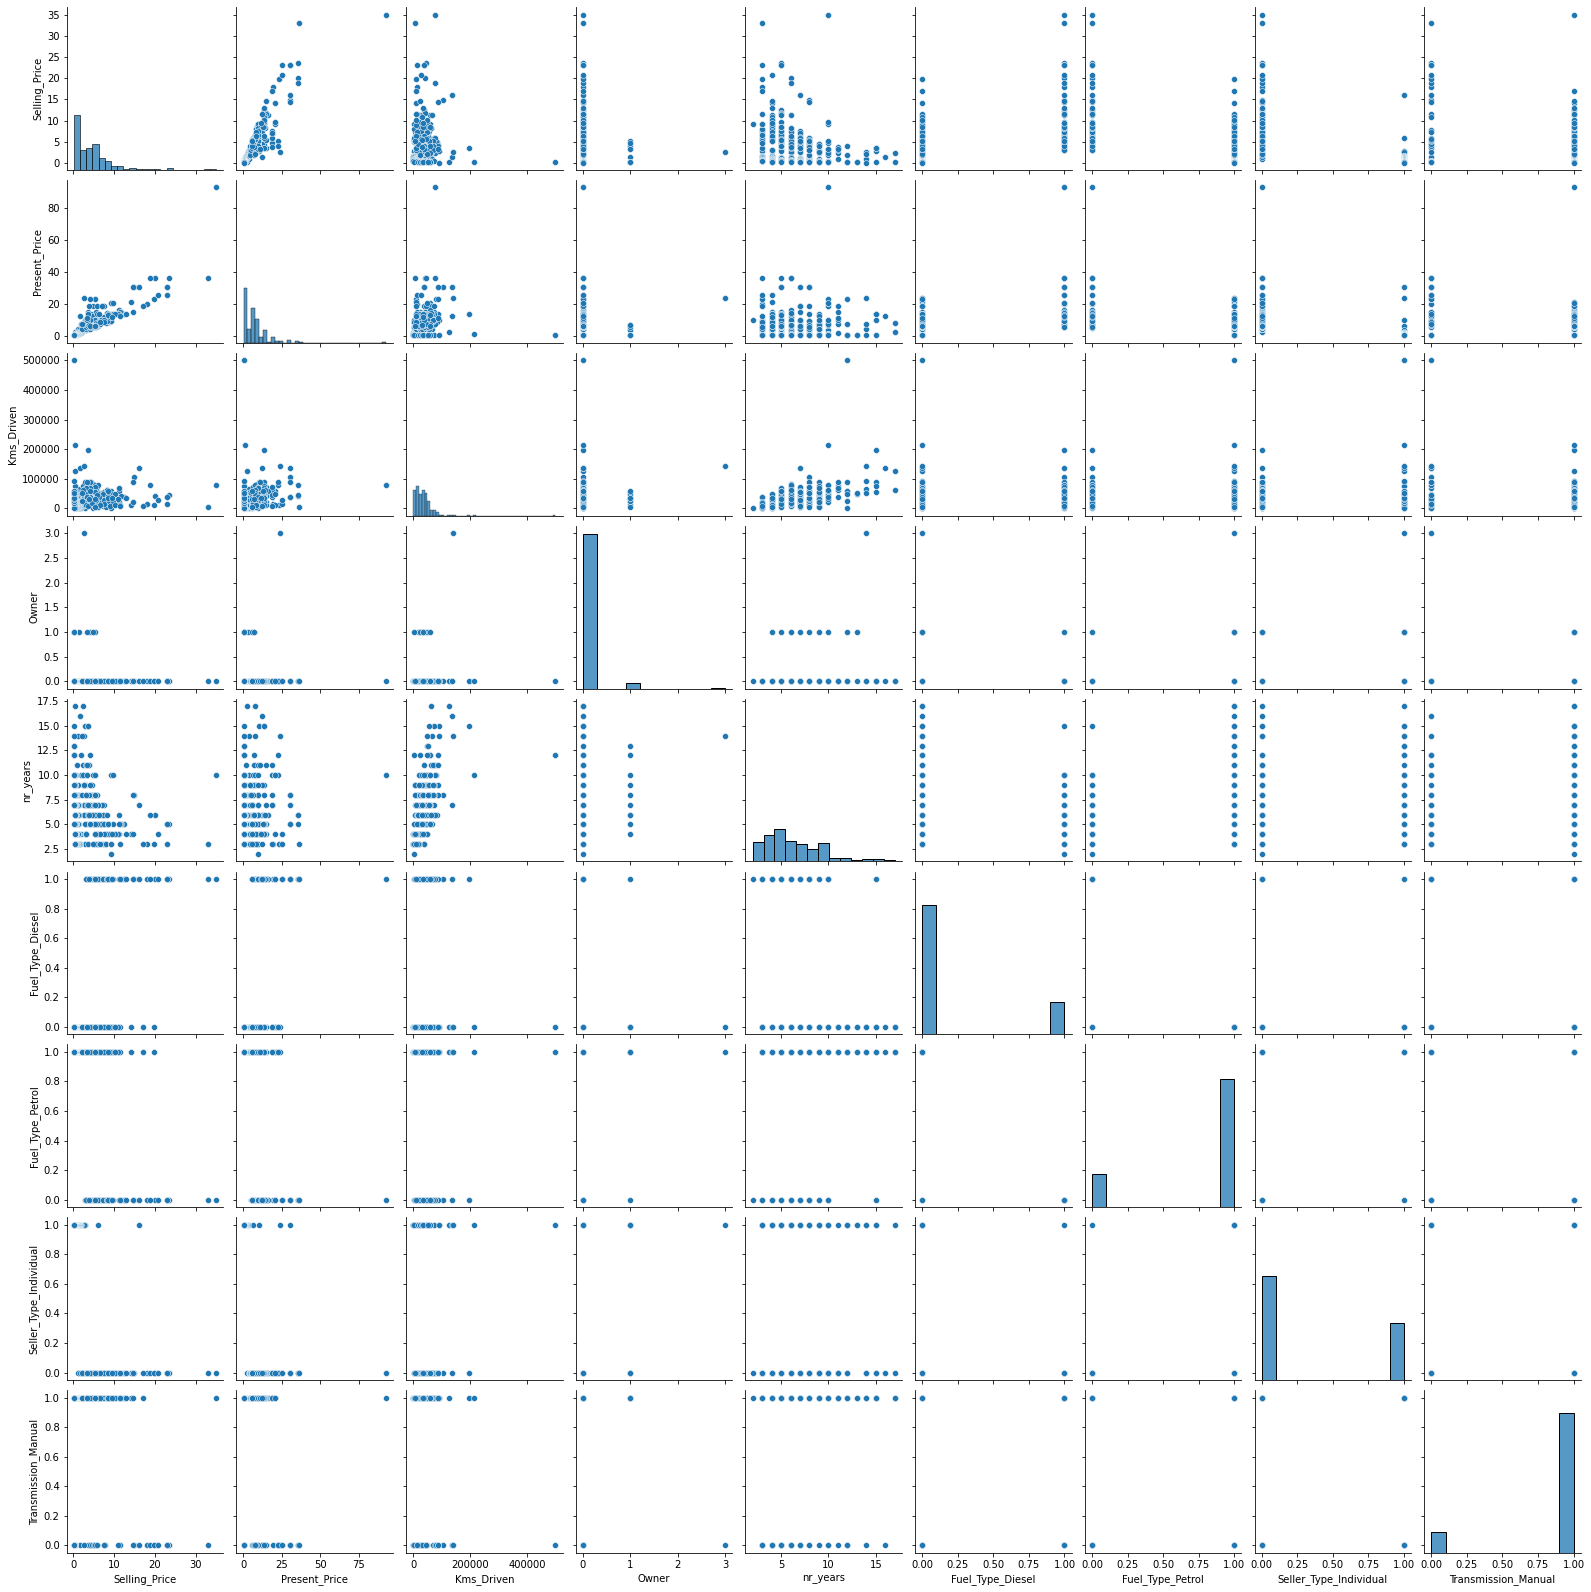

In [17]:
# Show scatterplot of each and everry feature

sns.pairplot(df)

In [18]:
# Separating X and y

X = df.drop("Selling_Price", axis=1).copy()
y = df["Selling_Price"]
X.head()

,Present_Price,Kms_Driven,Owner,nr_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [20]:
# Present_Price is the most important features 

model.feature_importances_

array([0.35896037, 0.0391628 , 0.00086006, 0.07811184, 0.23533631,
       0.01037737, 0.12657283, 0.15061841])

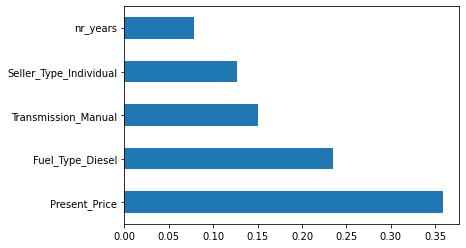

In [21]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# I will choose 2 ML models to train : RandomForest and XGBoost

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Hyperparameter tuning with Randomized Search CV (it is faster than GridSearchCV)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
search = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [29]:
search.best_score_

-3.9999395754860836

In [30]:
best_rf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=25)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [31]:
# Model Performance on Test set
from sklearn.metrics import r2_score

pred_test = best_rf.predict(X_test)
print(r2_score(y_test, pred_test))

0.8665181159680165


In [32]:
search = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
search.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [34]:
search.best_score_

-2.5405386862105463

In [37]:
best_gb = GradientBoostingRegressor(n_estimators=700 , min_samples_split=15  , min_samples_leaf=1, max_features="auto",
                                    max_depth=20)
best_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20, max_features='auto',
                          min_samples_split=15, n_estimators=700)

In [38]:
# Model Performance on Test set
from sklearn.metrics import r2_score

pred_test = best_gb.predict(X_test)
print(r2_score(y_test, pred_test))

0.9321372130196345


As we see, the performance of GradientBoosting on test set is higher than the performance of RandomForest. So we select GradientBoosting.

D:\Anaconda\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

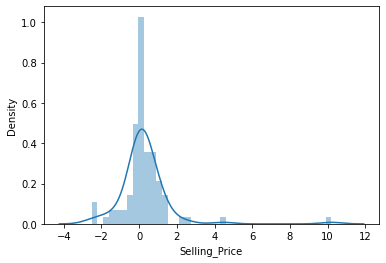

In [42]:
# The distribution of residuals is normally distributed (Gassian Distribution) which means our model is performing very well. 
sns.distplot(y_test-pred_test)

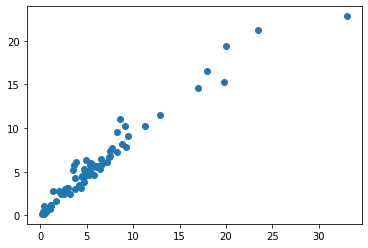

In [43]:
plt.scatter(y_test,pred_test)

In [44]:
import pickle

file = open('gradient_boosting.pkl', 'wb')
pickle.dump(best_gb, file)